In [1]:
# import packages
%matplotlib inline
from scipy.io import netcdf
from netCDF4 import Dataset as NetCDFFile 
import pyproj
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ftplib
import os

In [123]:
# soil moisture
soil_moisture = np.load('SIX_MONTH_VALUES_SMAP_2015_2016.npy')
soil_moisture_lat = np.load('LAT_2015_2016.npy')
soil_moisture_lon = np.load('LON_2015_2016.npy') + 360
print(soil_moisture.shape)

soil_moisture[soil_moisture==np.min(soil_moisture)] = None

(2, 177, 117)


In [121]:
# lat/lon to plot over
lon_min = min(soil_moisture_lon) - 0.5
lat_min = min(soil_moisture_lat) - 0.5
lon_max = max(soil_moisture_lon) + 0.5
lat_max = max(soil_moisture_lat) + 0.5

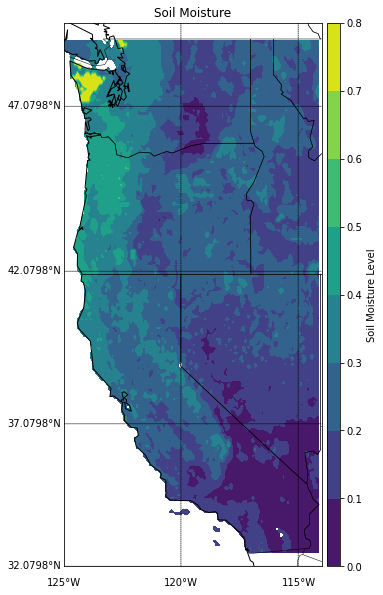

In [147]:
# create map
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

lons,lats= np.meshgrid(soil_moisture_lon,soil_moisture_lat) 
x,y = map(lons,lats)

# add states and border masks
plt.figure(figsize=(15,10))
map.drawcoastlines()
map.drawstates()
map.drawcountries()

# add lat/lon masks
parallels = np.arange(lat_min,lat_max,5.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(lon_min,lon_max,5.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# plot soil moisture data
soil_moisture_data = map.contourf(x,y,soil_moisture[0,:,:])
cb = map.colorbar(soil_moisture_data,"right", size="5%", pad="2%")
plt.title('Soil Moisture')
cb.set_label('Soil Moisture Level')
plt.show()

In [55]:
# spei
spei = NetCDFFile('data/spei06.nc')

In [135]:
# read variables from file
spei_var = spei.variables['spei'][:]
spei_lat = spei.variables['lat'][:]
spei_lon = spei.variables['lon'][:] + 360
spei_time = spei.variables['time'][:]

In [146]:
print(min(spei_lat))
print(max(spei_lat))
print(min(spei_lon))
print(max(spei_lon))
print(spei_var.shape)

print(spei_var[1410][109][244])

-89.75
89.75
180.25
539.75
(1416, 360, 720)
0.9845907


In [139]:
# lat/lon to plot over
lon_min = 235
lat_min = min(soil_moisture_lat) - 0.5
lon_max = 246
lat_max = max(soil_moisture_lat) + 0.5

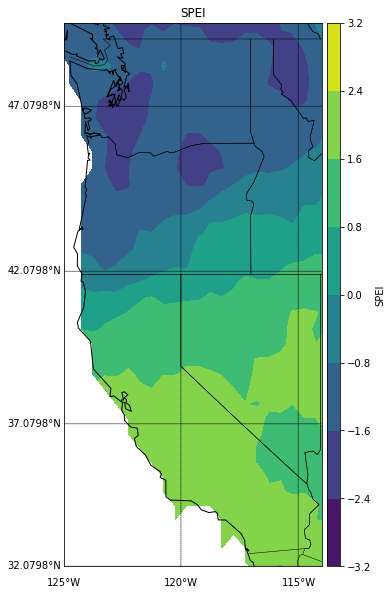

In [144]:
# create spei map
map = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='l') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

lons,lats= np.meshgrid(spei_lon,spei_lat) 
x,y = map(lons,lats)

# add states and border masks
plt.figure(figsize=(15,10))
map.drawcoastlines()
map.drawstates()
map.drawcountries()

# add lat/lon masks
parallels = np.arange(lat_min,lat_max,5.) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(lon_min,lon_max,5.) # make longitude lines every 5 degrees from 95W to 70W
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

# plot spei data
spei_data = map.contourf(x,y,spei_var[800,:,:])
cb = map.colorbar(spei_data,"right", size="5%", pad="2%")
plt.title('SPEI')
cb.set_label('SPEI')
plt.show()